<span style="font-size: 24px;">LAB 2</span>

1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

# Создание датасета используя make_blobs
X, y = make_blobs(n_samples=3000, centers=3, n_features=4, random_state=66)
features_amount = 4
df1 = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(0, features_amount)])
df1['target'] = y


2.

         feature_1    feature_2    feature_3    feature_4       target
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000
mean     -4.234254    -4.287947    -1.938520     3.795858     1.000000
std       3.365425     2.926872     5.621124     2.414045     0.816633
min     -10.063717   -10.212066   -11.478916    -2.277889     0.000000
25%      -6.859905    -6.737939    -7.602051     1.752348     0.000000
50%      -5.789589    -4.924900    -2.772800     3.618571     1.000000
75%      -0.358135    -1.302860     4.534003     5.893622     2.000000
max       3.371952     2.447720     8.847783     9.574564     2.000000
target
0    1000
1    1000
2    1000
Name: count, dtype: int64


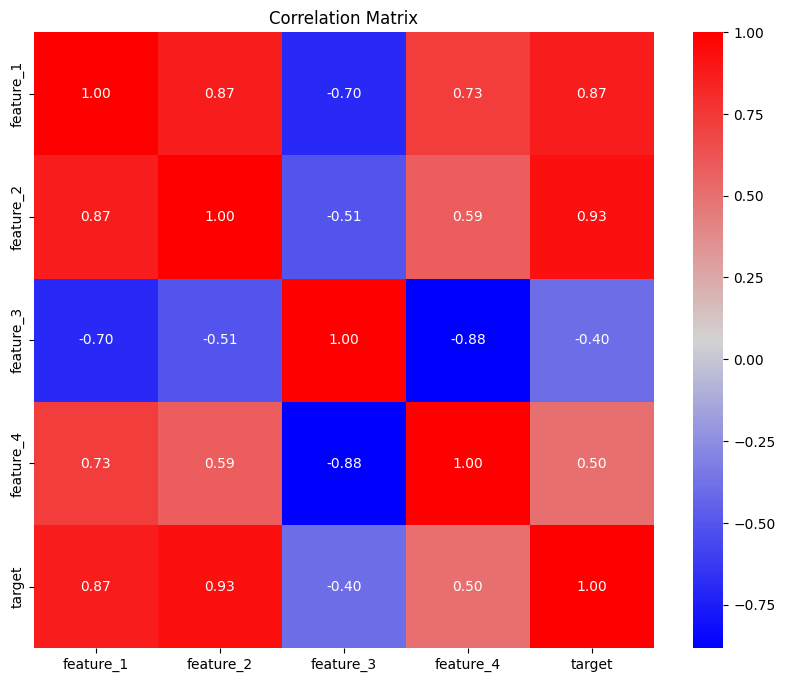

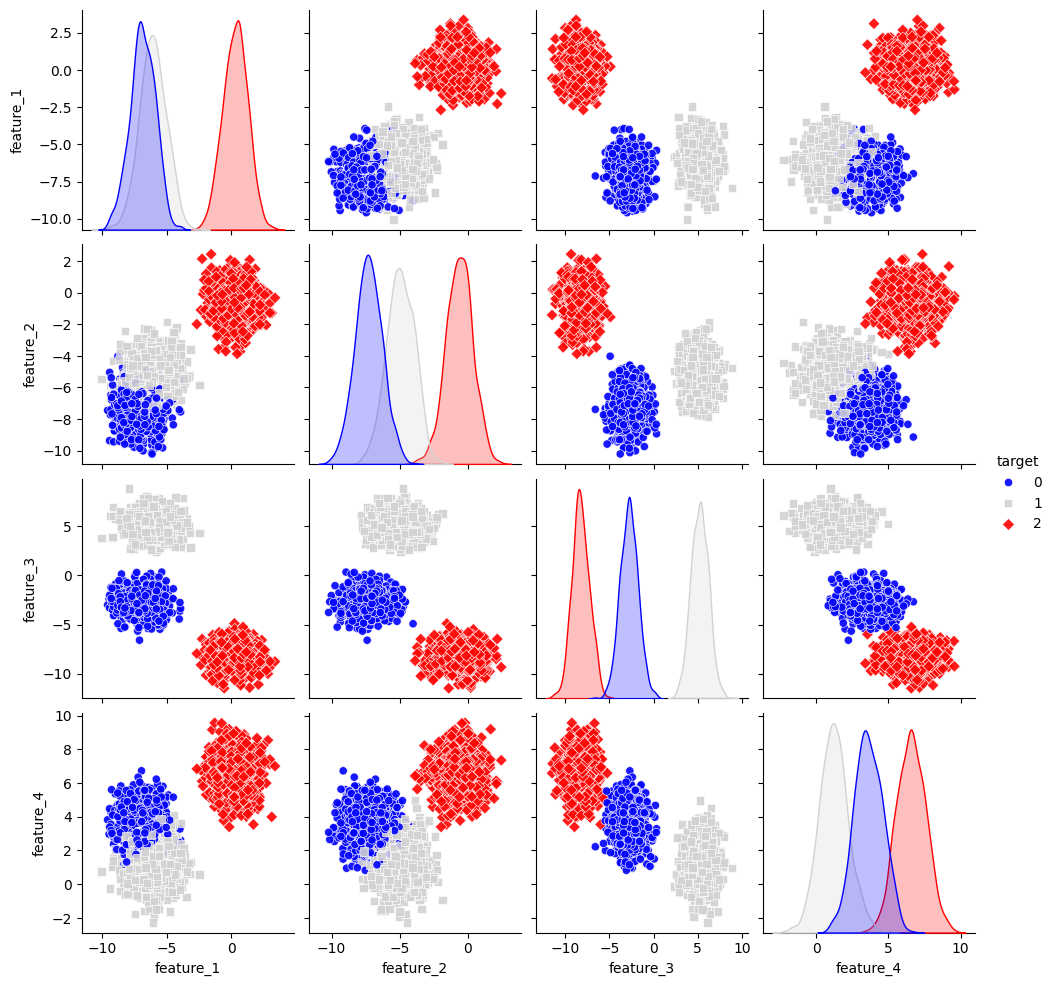

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["blue", "lightgray", "red"]

# Создаем пользовательскую палитру
cmap = LinearSegmentedColormap.from_list("blue_to_purple", colors)
palette = [cmap(i) for i in np.linspace(0, 1, 3)]

# Ключевые характеристики датасета
print(df1.describe())
print(df1['target'].value_counts())

# Корреляции
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Визуализация всех пар переменных
sns.pairplot(df1, hue='target', markers=['o', 's', 'D'], palette=palette, diag_kind='kde', plot_kws={'alpha':0.1})
plt.show()

3.

In [3]:
def create_scale_datasets_for_0_target(df, repeat_counts):
    datasets = {}
    for count in repeat_counts:
        df_repeated = df.copy()
        df_repeated = pd.concat([df_repeated[df_repeated['target'] == 0]] * count + # увеличение класса 0 в count раз
            [df_repeated[df_repeated['target'] == 1]] + [df_repeated[df_repeated['target'] == 2]], ignore_index=True)
        datasets[f'df{count}'] = df_repeated.sample(frac=1).reset_index(drop=True)
    return datasets

# Новые датасеты
repeat_counts = [2, 5, 10, 20, 50, 100, 1000]
datasets = create_scale_datasets_for_0_target(df1, repeat_counts)

for key, value in datasets.items():
    print(f"Dataset {key} with {len(value)} samples")


Dataset df2 with 4000 samples
Dataset df5 with 7000 samples
Dataset df10 with 12000 samples
Dataset df20 with 22000 samples
Dataset df50 with 52000 samples
Dataset df100 with 102000 samples
Dataset df1000 with 1002000 samples


4.

drawing LDA for df2...
drawing LDA for df5...
drawing LDA for df10...
drawing LDA for df20...
drawing LDA for df50...
drawing LDA for df100...
drawing LDA for df1000...


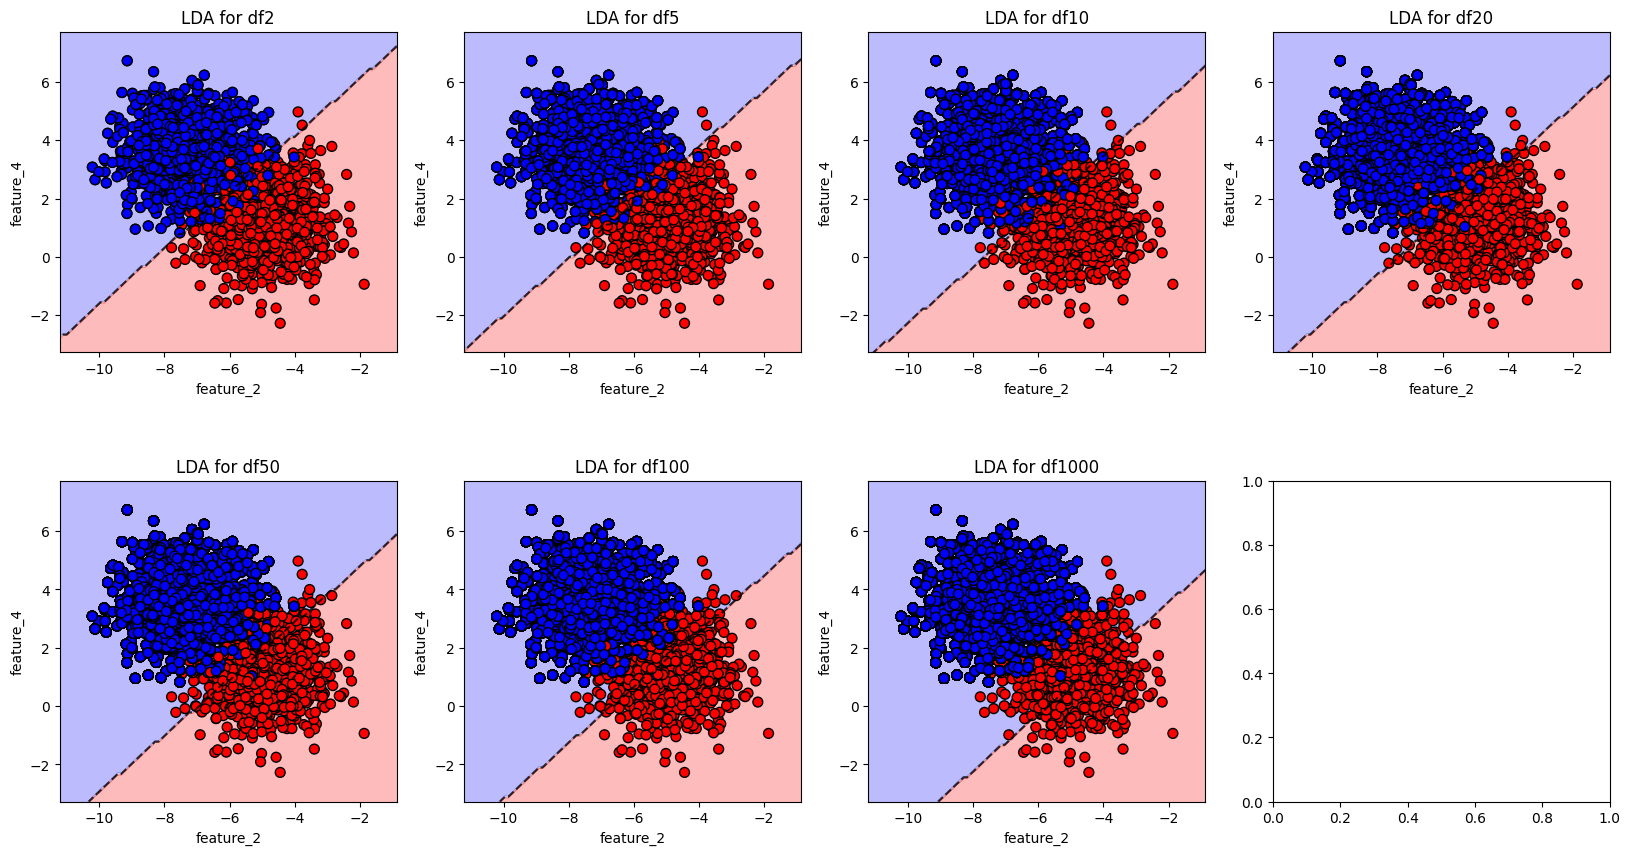

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

choose_classes = [0, 1]
choose_features = ['feature_2', 'feature_4']

# Визуализация LDA
def visualize_lda(dataset, title):
    df_filtered = dataset[dataset['target'].isin(choose_classes)]
    X = df_filtered[choose_features]
    y = df_filtered['target']

    lda = LinearDiscriminantAnalysis()
    lda.fit(X, y)
    
    # Создание сетки для визуализации
    x_min, x_max = X[choose_features[0]].min() - 1, X[choose_features[0]].max() + 1
    y_min, y_max = X[choose_features[1]].min() - 1, X[choose_features[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Преобразование в DataFrame для предотвращения предупреждений
    mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=choose_features)
    # Прогноз LDA для каждой точки сетки
    Z = lda.predict(mesh_df)
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[choose_features[0]], X[choose_features[1]], c=y, cmap=cmap, edgecolor='k', s=50)
    plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.8, linestyles=['--'])  # Решающая граница
    plt.title(title)
    plt.xlabel(f'{choose_features[0]}')
    plt.ylabel(f'{choose_features[1]}')

# Применяем LDA для каждого датасета и выводим в сетке
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 строки, 4 столбца
plt.subplots_adjust(hspace=0.4)

for i, (key, dataset) in enumerate(datasets.items()):
    ax = axs[i // 4, i % 4]
    plt.sca(ax)
    visualize_lda(dataset, title=f'LDA for {key}')
    print(f'drawing LDA for {key}...')
plt.show()

5.

drawing LinearSVC for df2...
drawing LinearSVC for df5...
drawing LinearSVC for df10...
drawing LinearSVC for df20...
drawing LinearSVC for df50...
drawing LinearSVC for df100...
drawing LinearSVC for df1000...


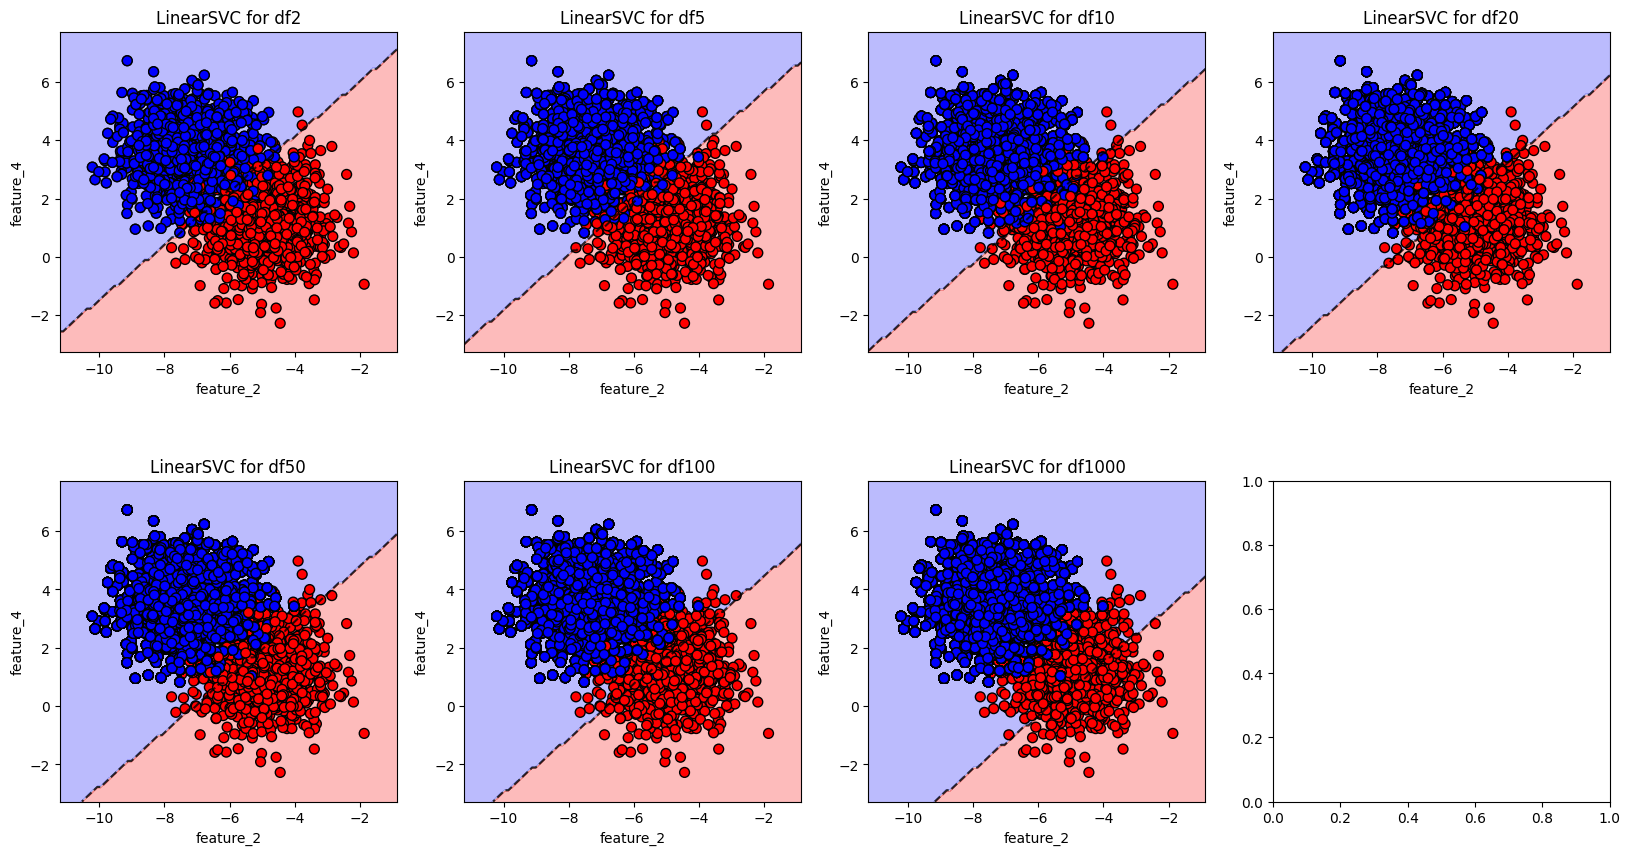

In [5]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

# Визуализация LinearSVC
def visualize_svc(dataset, title):
    df_filtered = dataset[dataset['target'].isin(choose_classes)]
    X = df_filtered[choose_features]
    y = df_filtered['target']
    
    # Масштабирование данных
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Обучение модели LinearSVC с увеличенным числом итераций и dual=False
    svc = LinearSVC(dual=False, max_iter=5000)
    svc.fit(X_scaled, y)
    
    # Создание сетки для визуализации
    x_min, x_max = X[choose_features[0]].min() - 1, X[choose_features[0]].max() + 1
    y_min, y_max = X[choose_features[1]].min() - 1, X[choose_features[1]].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Преобразование в DataFrame для предотвращения предупреждений
    mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=choose_features)
    
    # Масштабирование сетки данных
    mesh_df_scaled = scaler.transform(mesh_df)

    # Прогноз LinearSVC для каждой точки сетки
    Z = svc.predict(mesh_df_scaled)
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[choose_features[0]], X[choose_features[1]], c=y, cmap=cmap, edgecolor='k', s=50)
    plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.8, linestyles=['--'])  # Решающая граница
    plt.title(title)
    plt.xlabel(f'{choose_features[0]}')
    plt.ylabel(f'{choose_features[1]}')

# Применяем LinearSVC для каждого датасета и выводим в сетке
fig, axs = plt.subplots(2, 4, figsize=(20, 10))  # 2 строки, 4 столбца
plt.subplots_adjust(hspace=0.4)

for i, (key, dataset) in enumerate(datasets.items()):
    ax = axs[i // 4, i % 4]
    plt.sca(ax)
    visualize_svc(dataset, title=f'LinearSVC for {key}')
    print(f'drawing LinearSVC for {key}...')
plt.show()

6.

find some coordinates for df2...
find some coordinates for df5...
find some coordinates for df10...
find some coordinates for df20...
find some coordinates for df50...
find some coordinates for df100...
find some coordinates for df1000...


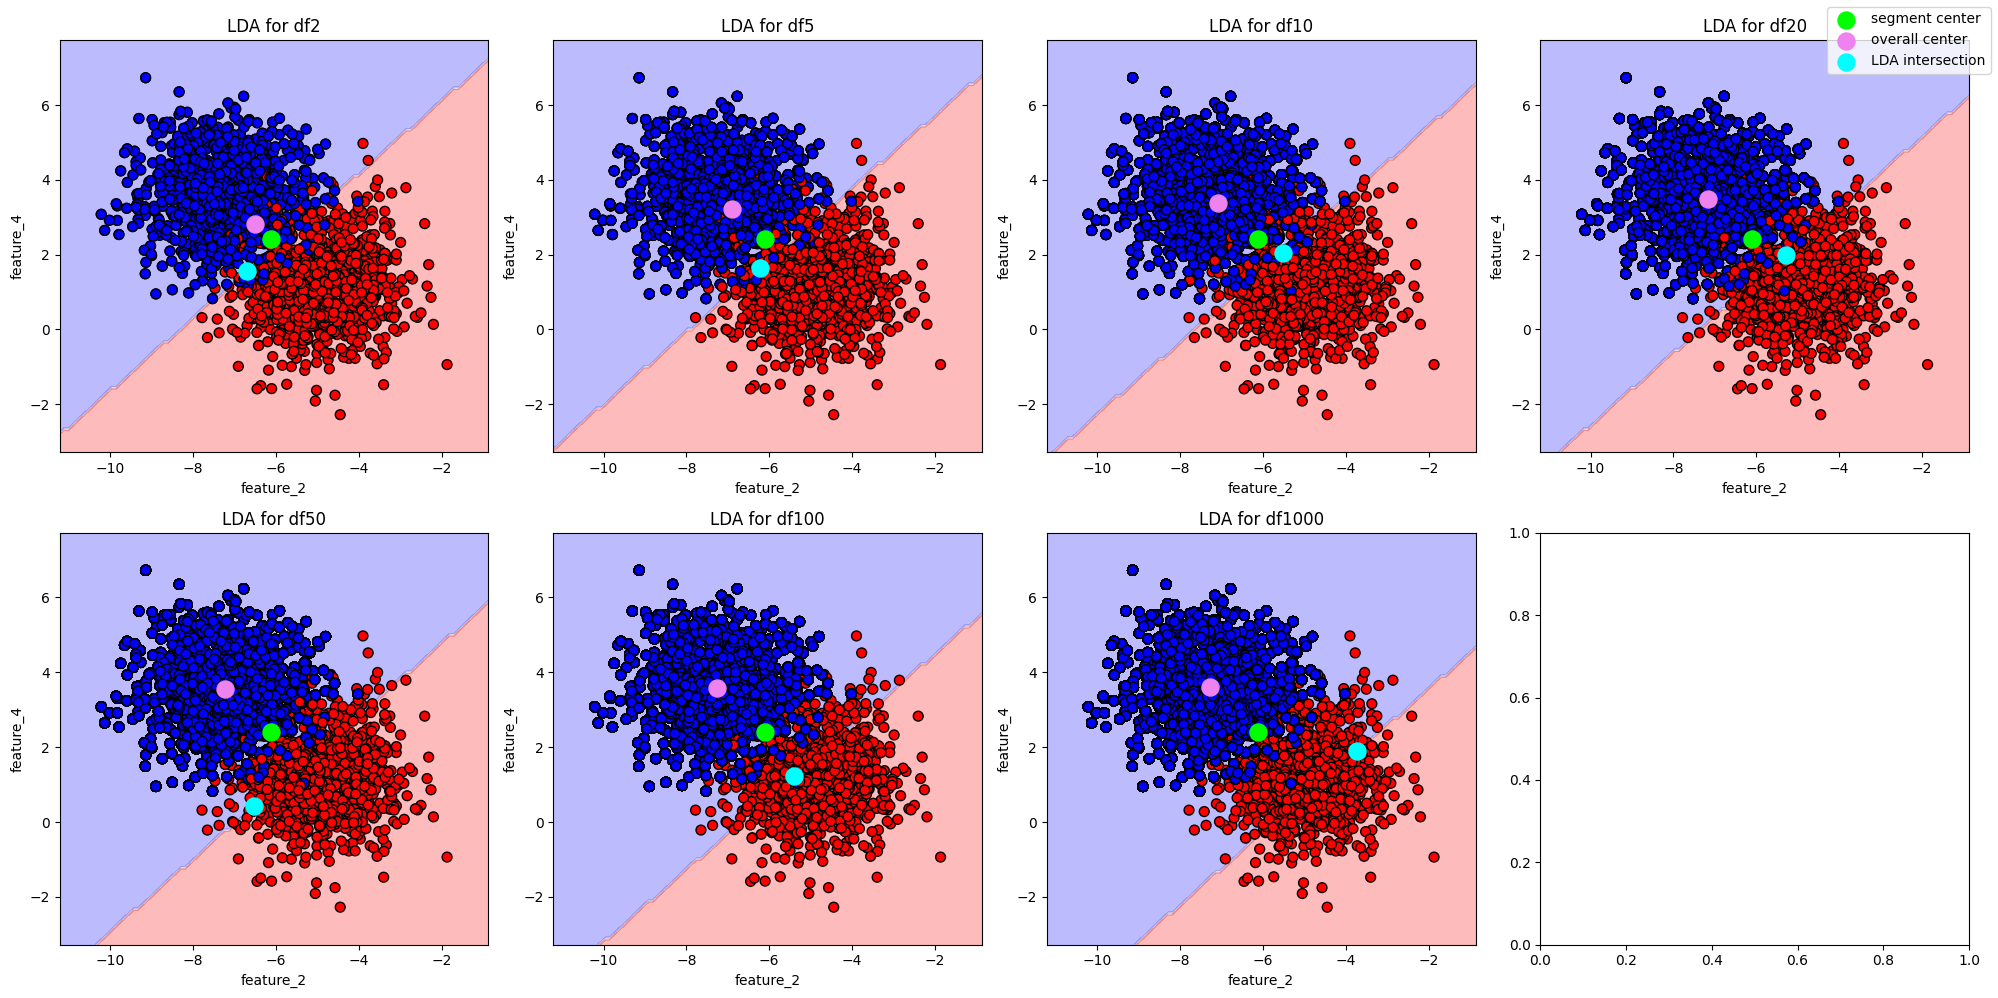

In [6]:
scatter_colors = ['lime', 'violet', 'aqua']

def find_coordinates(dataset, lda_model):
    df_filtered = dataset[dataset['target'].isin(choose_classes)]
    X = df_filtered[choose_features]
    
    # Вычисляем центры классов
    center_class_1 = df_filtered[df_filtered['target'] == 0][choose_features].mean().values.tolist()
    center_class_2 = df_filtered[df_filtered['target'] == 1][choose_features].mean().values.tolist()
    segment_center = ((np.array(center_class_1) + np.array(center_class_2)) / 2).tolist()

    # Общий центр
    overall_center = df_filtered[choose_features].mean().values.tolist()

    # Пересечение LDA
    lda_decision = lda_model.decision_function(X)
    intersection_point_lda = X.iloc[np.argmin(np.abs(lda_decision))].values.tolist()

    return {
        'segment_center': segment_center, 
        'overall_center': overall_center,
        'intersection_point': intersection_point_lda
    }

def visualize_lda_for_all_datasets(datasets, coordinates):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.flatten()

    for i, (key, dataset) in enumerate(datasets.items()):
        df_filtered = dataset[dataset['target'].isin(choose_classes)]
        X = df_filtered[choose_features]
        y = df_filtered['target']

        lda_model = LinearDiscriminantAnalysis()
        lda_model.fit(X, y)

        # Определяем границы для сетки
        x_min, x_max = X[choose_features[0]].min() - 1, X[choose_features[0]].max() + 1
        y_min, y_max = X[choose_features[1]].min() - 1, X[choose_features[1]].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

        # Преобразование в DataFrame для предотвращения предупреждений
        mesh_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=choose_features)
        # Прогноз LDA для каждой точки сетки
        Z = lda_model.predict(mesh_df)
        Z = Z.reshape(xx.shape)

        ax = axes[i]  # Выбираем текущий подграфик
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
        ax.scatter(X[choose_features[0]], X[choose_features[1]], c=y, cmap=cmap, edgecolor='k', s=50)

        # Отображаем центры и пересечения
        ax.scatter(coordinates[key]['segment_center'][0], coordinates[key]['segment_center'][1], 
                   color=scatter_colors[0], label='segment center', s=150)
        ax.scatter(coordinates[key]['overall_center'][0], coordinates[key]['overall_center'][1], 
                   color=scatter_colors[1], label='overall center', s=150)
        ax.scatter(coordinates[key]['intersection_point'][0], coordinates[key]['intersection_point'][1], 
                   color=scatter_colors[2], label='LDA intersection', s=150)

        ax.set_title(f'LDA for {key}')
        ax.set_xlabel(f'{choose_features[0]}')
        ax.set_ylabel(f'{choose_features[1]}')

    # Добавляем легенду к последнему подграфику
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    plt.tight_layout()
    plt.show()

# Сохраняем координаты и визуализируем для каждого датасета
coordinates = {}
for key, dataset in datasets.items():
    lda_model = LinearDiscriminantAnalysis()
    
    df_filtered = dataset[dataset['target'].isin(choose_classes)]
    X = df_filtered[choose_features]
    y = df_filtered['target']
    
    lda_model.fit(X, y)
    print(f'find some coordinates for {key}...')
    coordinates[key] = find_coordinates(dataset, lda_model)

visualize_lda_for_all_datasets(datasets, coordinates)


7.

Plotting curves for df2 using LDA and target class 0...
Plotting curves for df5 using LDA and target class 0...
Plotting curves for df10 using LDA and target class 0...
Plotting curves for df20 using LDA and target class 0...
Plotting curves for df50 using LDA and target class 0...
Plotting curves for df100 using LDA and target class 0...
Plotting curves for df1000 using LDA and target class 0...


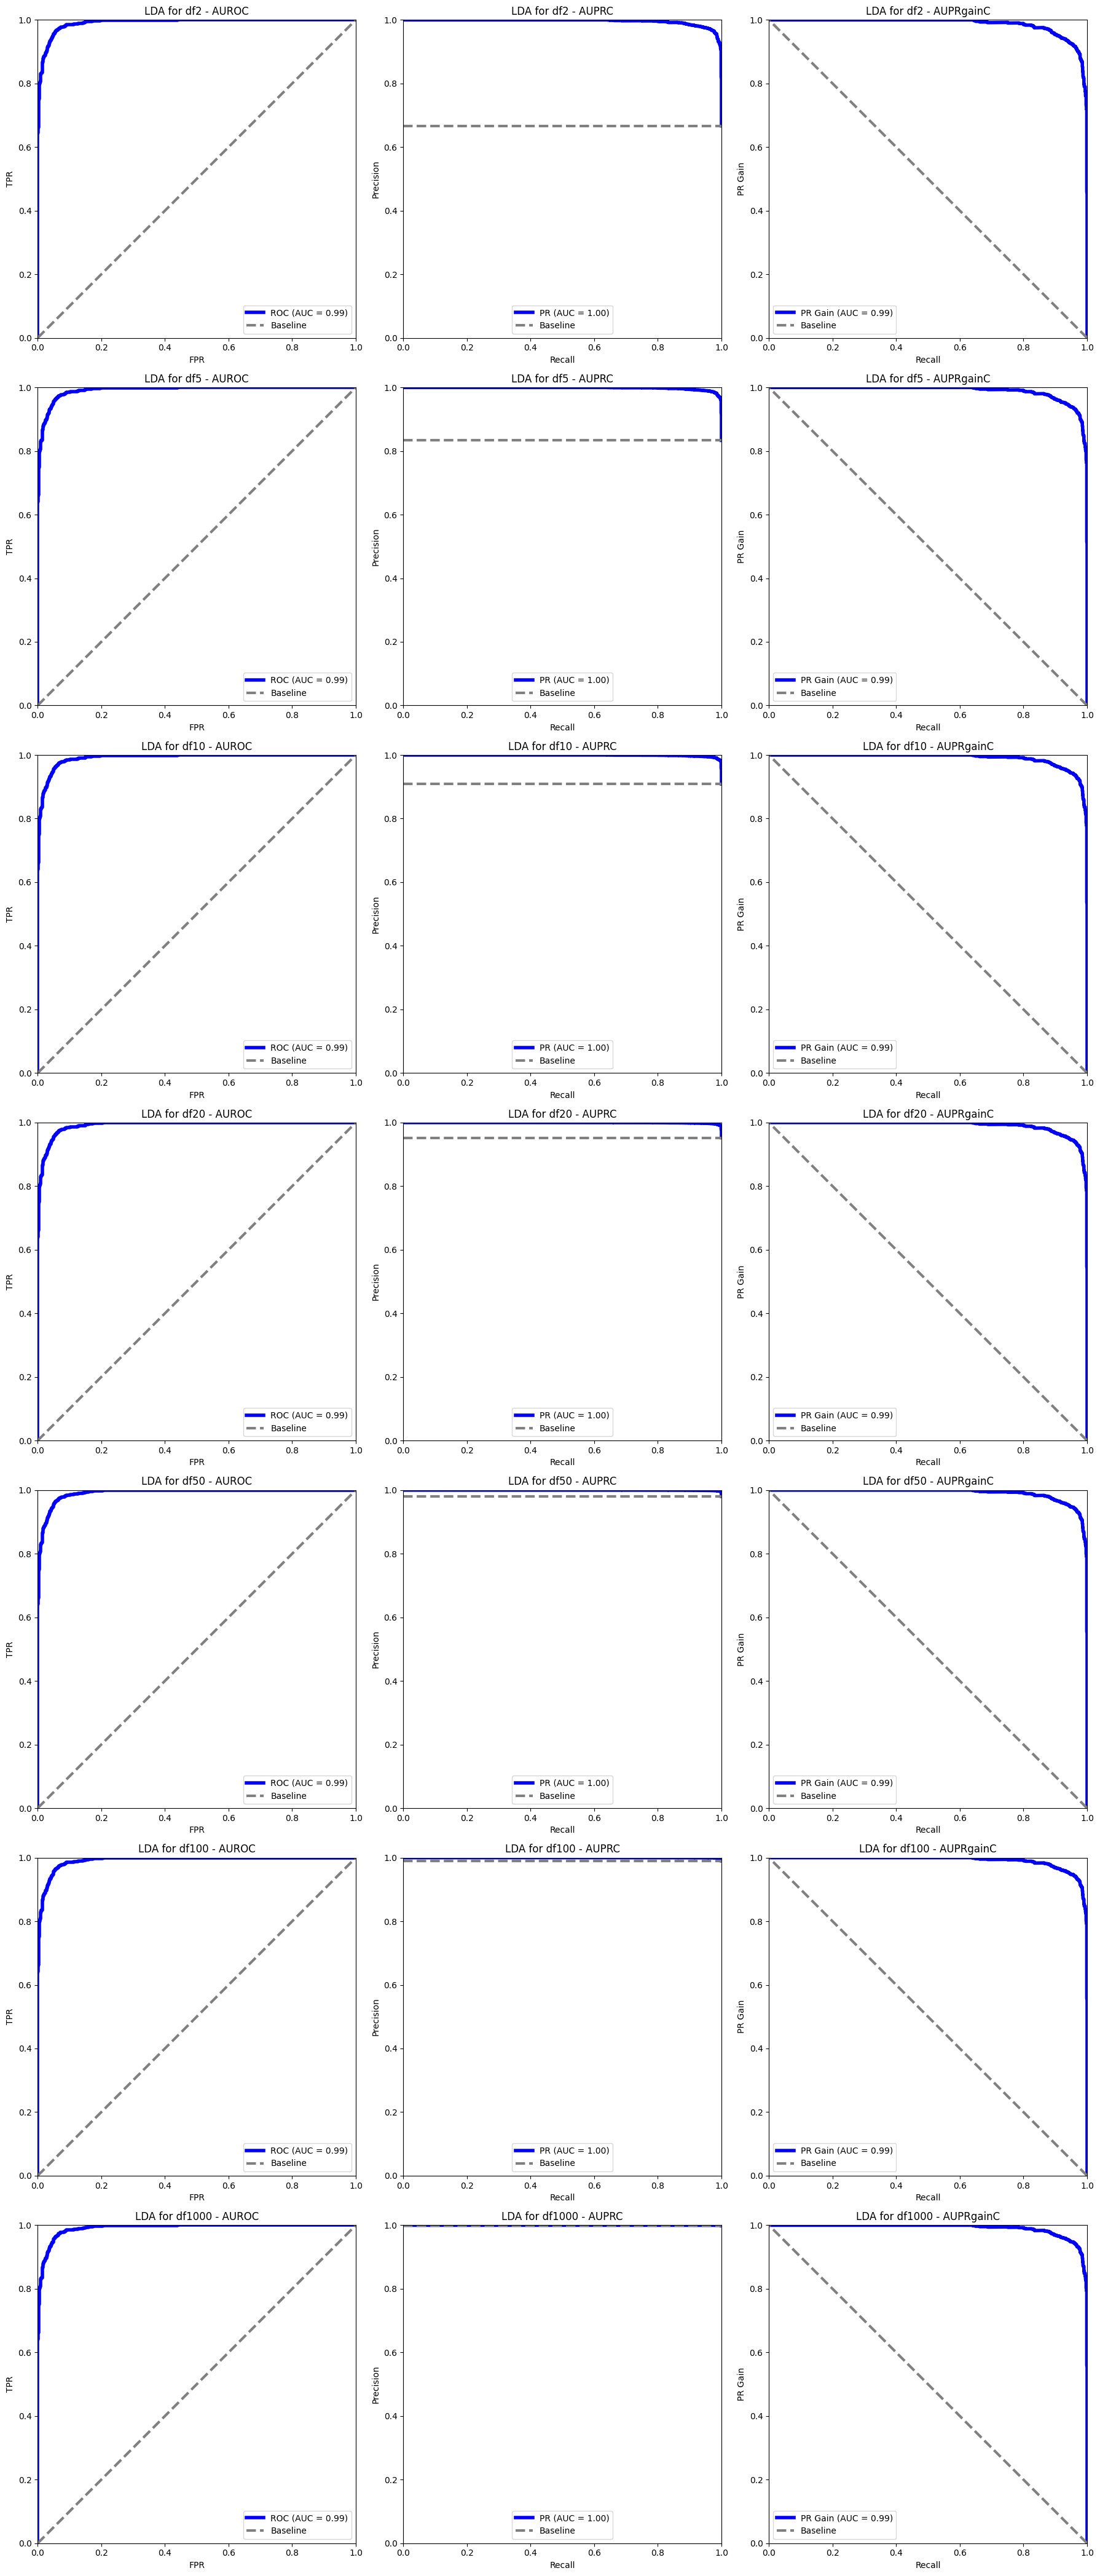

In [7]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Функция для построения ROC и PR кривых
def plot_curves(axs, row_idx, target_class, dataset, model, key):
    df_filtered = dataset[dataset['target'].isin(choose_classes)]
    X = df_filtered[choose_features]
    y = (df_filtered['target'] == target_class).astype(int)

    # Прогноз
    model.fit(X, y)
    y_scores = model.decision_function(X)

    # ROC
    fpr, tpr, _ = roc_curve(y, y_scores)
    roc_auc = auc(fpr, tpr)

    # PR
    precision, recall, _ = precision_recall_curve(y, y_scores)
    pr_auc = auc(recall, precision)
    baseline = (df_filtered['target'] == target_class).sum() / len(df_filtered)

    pr_gain = (precision - baseline) / (1 - baseline)
    pr_gain[pr_gain < 0] = 0 
    pr_gain_auc = auc(recall, pr_gain)

    # Визуализация ROC
    axs[row_idx, 0].plot(fpr, tpr, color='blue', linewidth=4, label='ROC (AUC = {:.2f})'.format(roc_auc))
    axs[row_idx, 0].plot([0, 1], [0, 1], color='gray', linewidth=3, linestyle='--', label='Baseline')
    axs[row_idx, 0].set_xlim([0.0, 1.0])
    axs[row_idx, 0].set_ylim([0.0, 1.0])
    axs[row_idx, 0].set_xlabel('FPR')
    axs[row_idx, 0].set_ylabel('TPR')
    axs[row_idx, 0].set_title(f'LDA for {key} - AUROC')
    axs[row_idx, 0].legend(loc='lower right')

    # Визуализация PR
    axs[row_idx, 1].plot(recall, precision, color='blue', linewidth=4, label='PR (AUC = {:.2f})'.format(pr_auc))
    axs[row_idx, 1].axhline(y=baseline, color='gray', linewidth=3, linestyle='--', label='Baseline')
    axs[row_idx, 1].set_xlim([0.0, 1.0])
    axs[row_idx, 1].set_ylim([0.0, 1.0])
    axs[row_idx, 1].set_xlabel('Recall')
    axs[row_idx, 1].set_ylabel('Precision')
    axs[row_idx, 1].set_title(f'LDA for {key} - AUPRC')
    axs[row_idx, 1].legend(loc='lower center')

    # Визуализация PR Gain
    axs[row_idx, 2].plot(recall, pr_gain, color='blue', linewidth=4, label='PR Gain (AUC = {:.2f})'.format(pr_gain_auc))
    axs[row_idx, 2].plot([1, 0], [0, 1], color='gray', linewidth=3, linestyle='--', label='Baseline')
    axs[row_idx, 2].set_xlim([0.0, 1.0])
    axs[row_idx, 2].set_ylim([0.0, 1.0])
    axs[row_idx, 2].set_xlabel('Recall')
    axs[row_idx, 2].set_ylabel('PR Gain')
    axs[row_idx, 2].set_title(f'LDA for {key} - AUPRgainC')
    axs[row_idx, 2].legend(loc='lower left')

def draw_metrics(target_class=0):
    num_datasets = len(datasets)
    fig, axs = plt.subplots(num_datasets, 3, figsize=(18, num_datasets * 6))

    for i, (key, dataset) in enumerate(datasets.items()):
        print(f'Plotting curves for {key} using LDA and target class {target_class}...')
        lda_model = LinearDiscriminantAnalysis()
        plot_curves(axs, i, target_class, dataset, lda_model, key=key)

    plt.tight_layout()
    plt.show()
    

# Применение для LDA для целевого класса 0    
draw_metrics(target_class=choose_classes[0])

8.

Plotting curves for df2 using LDA and target class 1...
Plotting curves for df5 using LDA and target class 1...
Plotting curves for df10 using LDA and target class 1...
Plotting curves for df20 using LDA and target class 1...
Plotting curves for df50 using LDA and target class 1...
Plotting curves for df100 using LDA and target class 1...
Plotting curves for df1000 using LDA and target class 1...


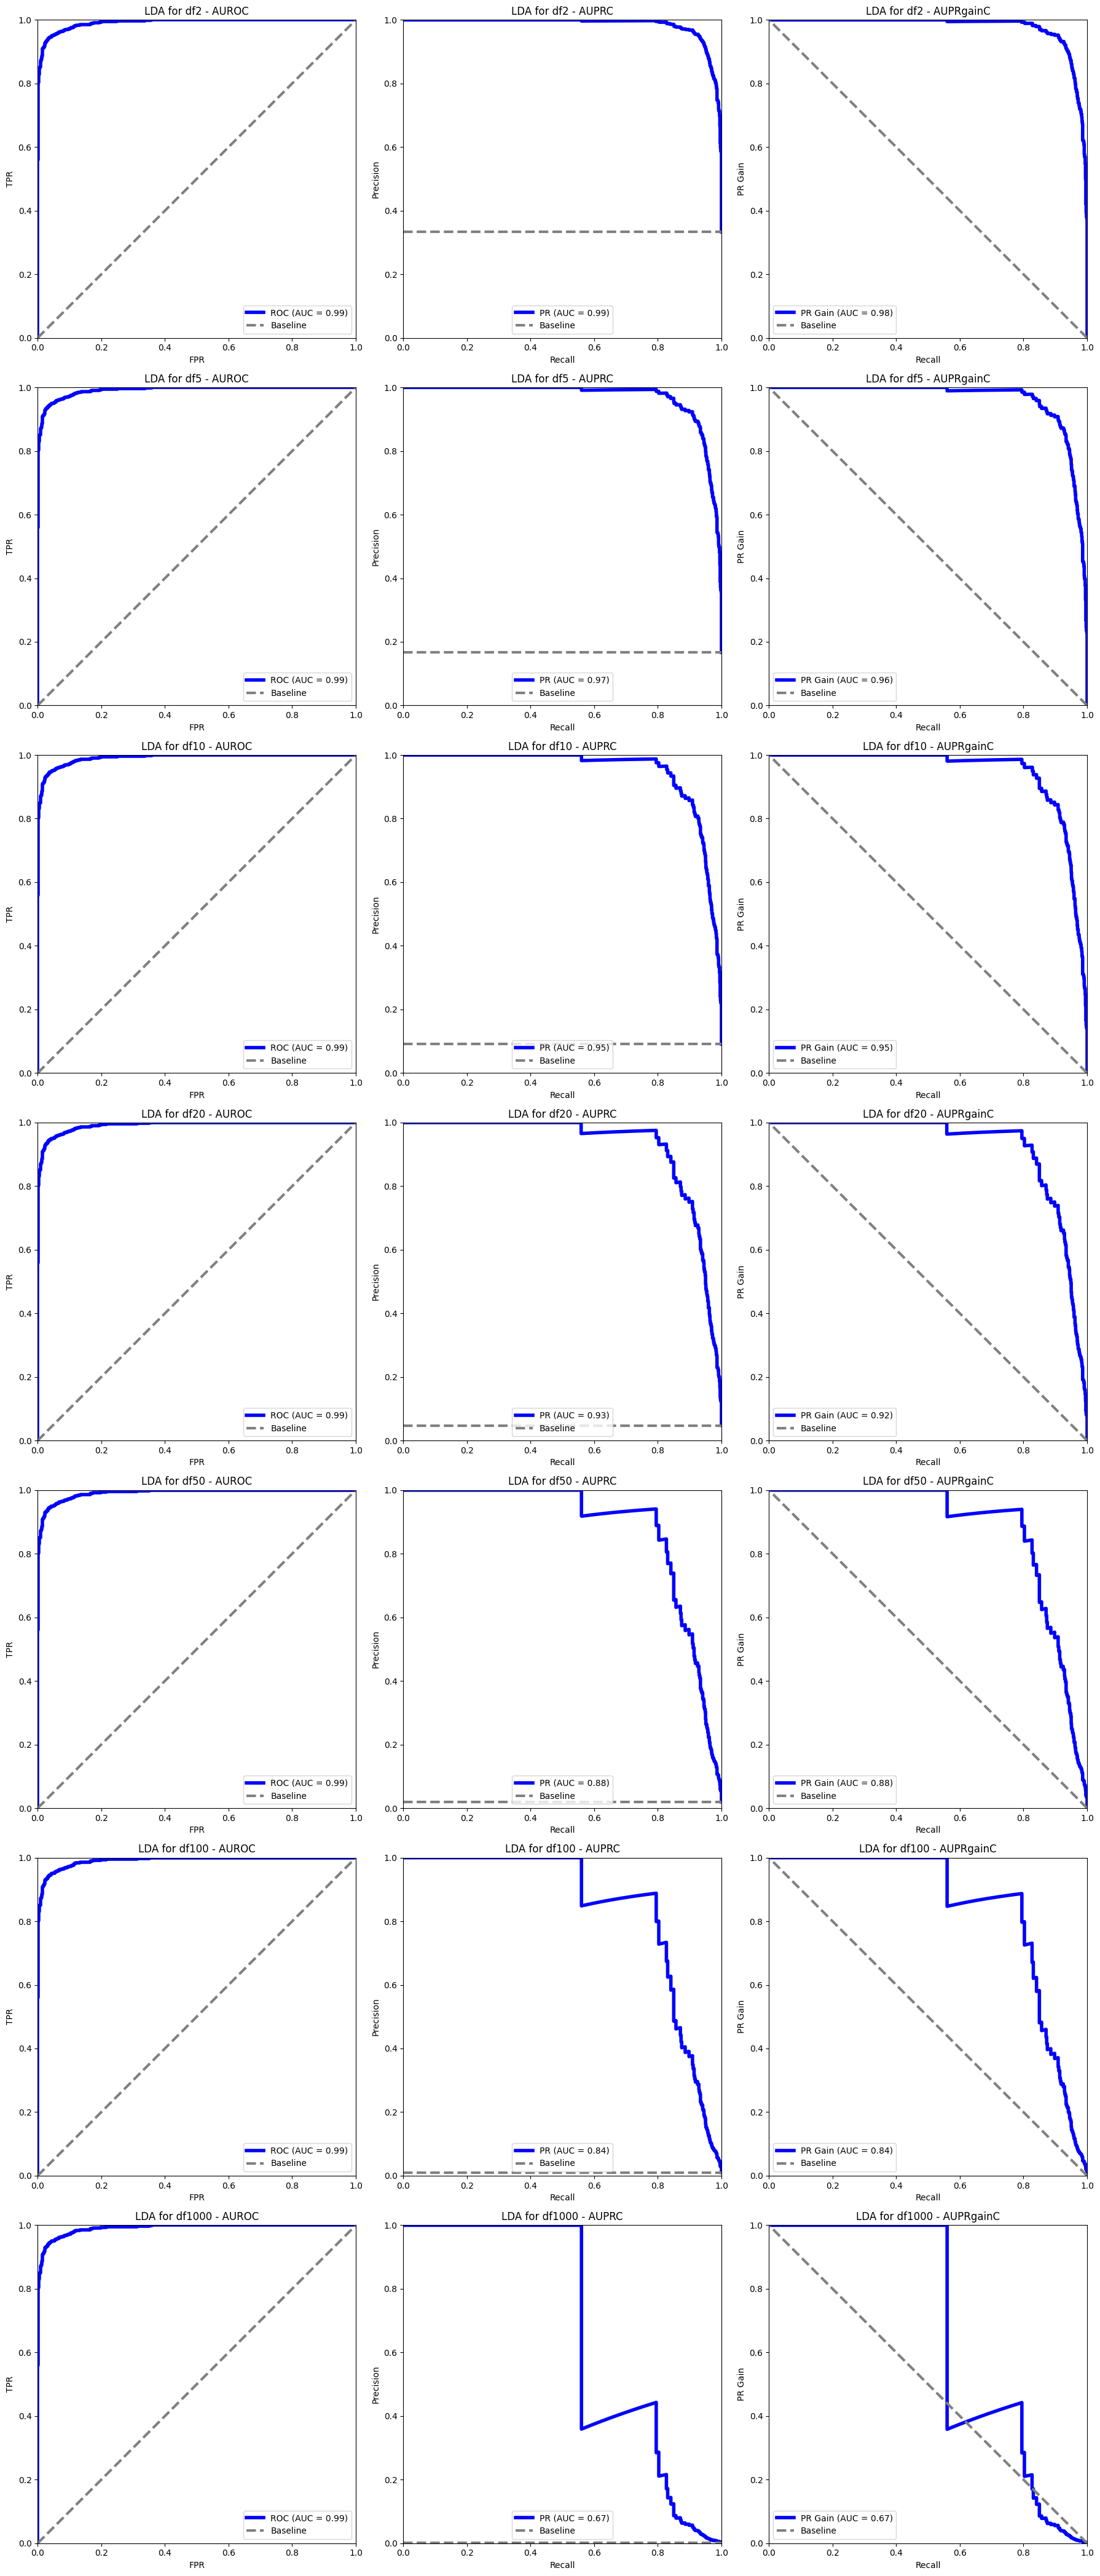

In [8]:
# Применение для LDA для целевого класса 1
draw_metrics(target_class=choose_classes[1])

9.

Making 3-fold cross-validation...


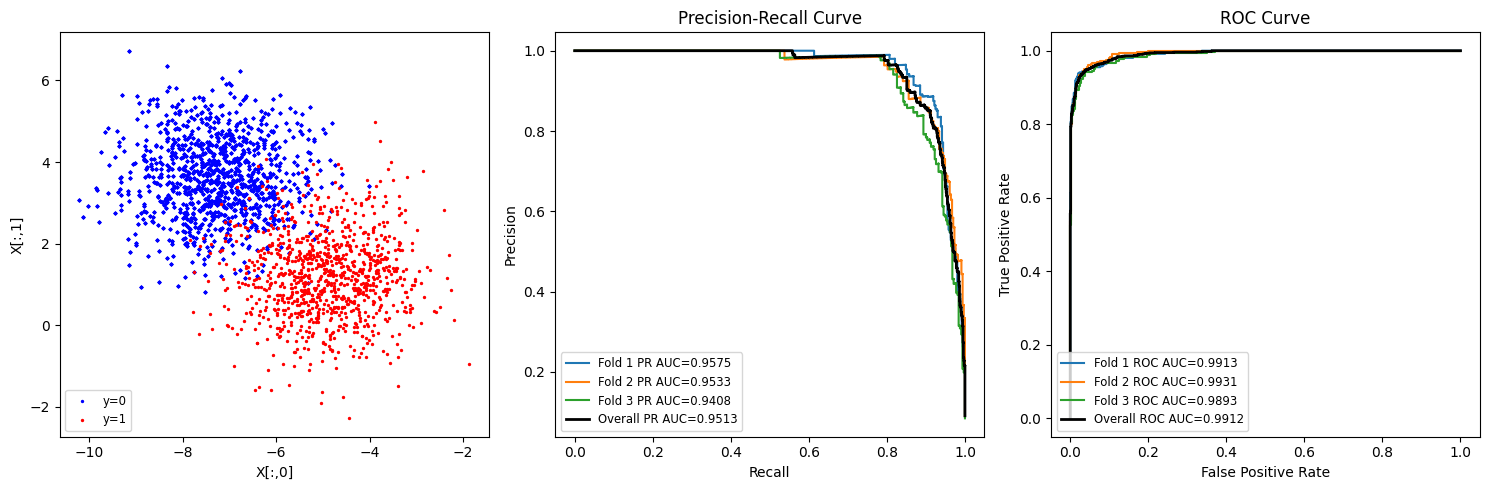

Making 5-fold cross-validation...


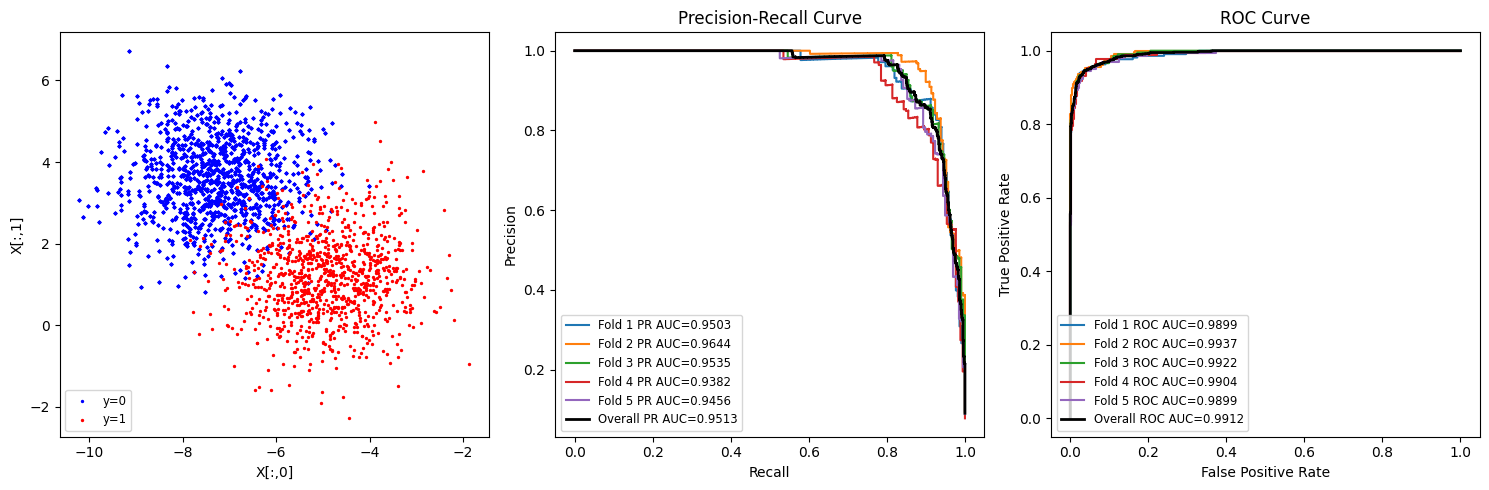

Making 10-fold cross-validation...


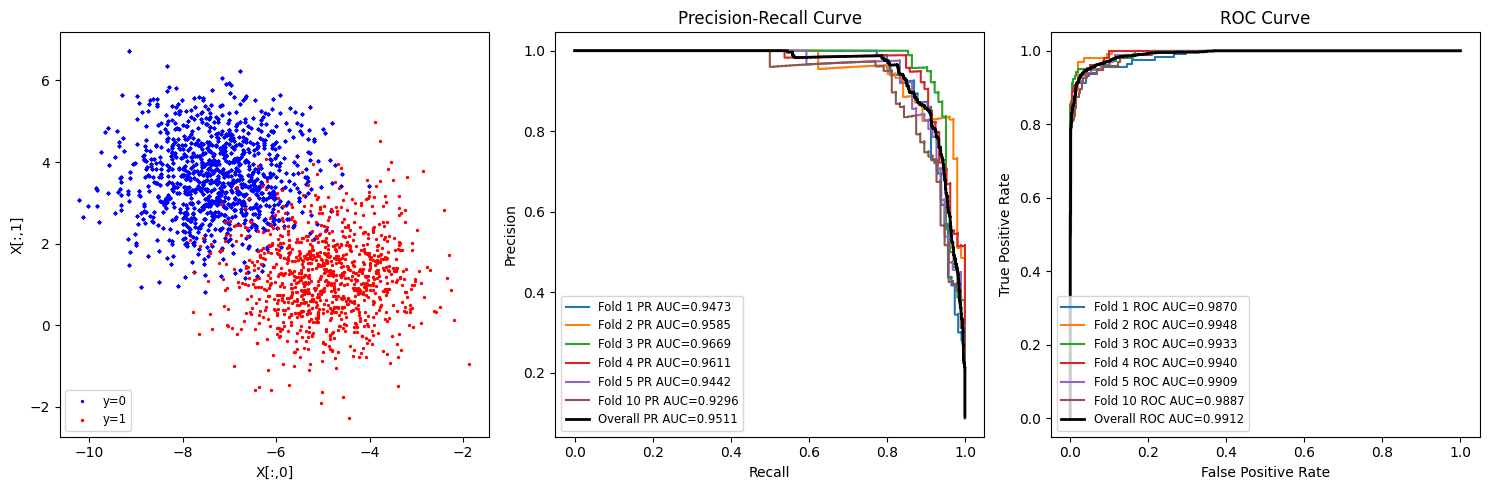

Making 20-fold cross-validation...


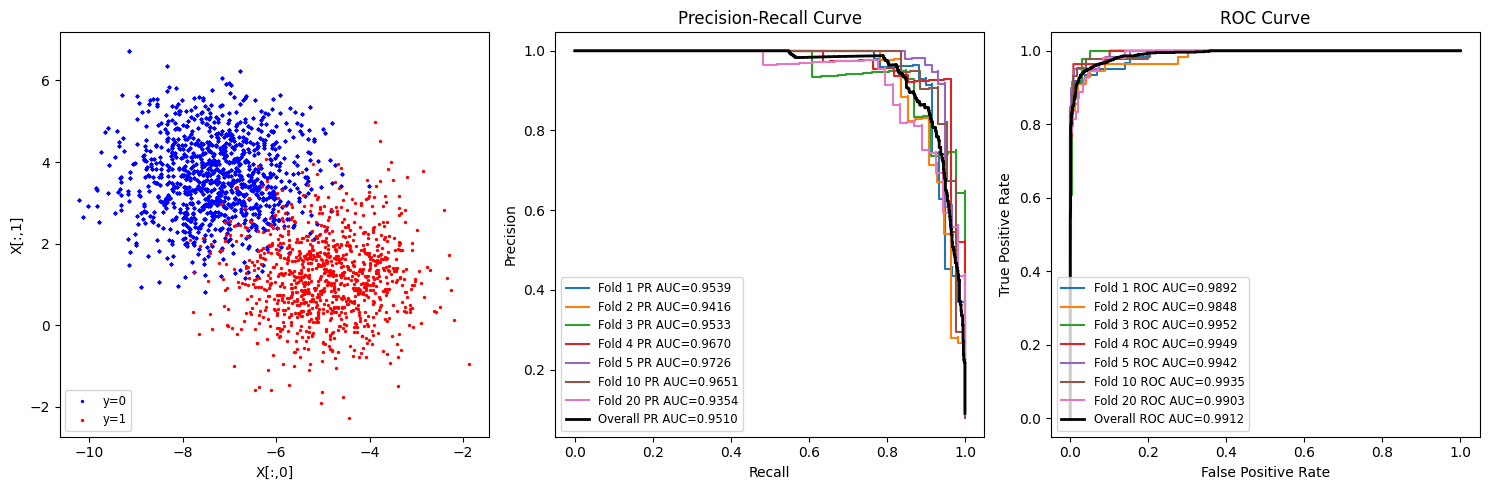

Making 50-fold cross-validation...


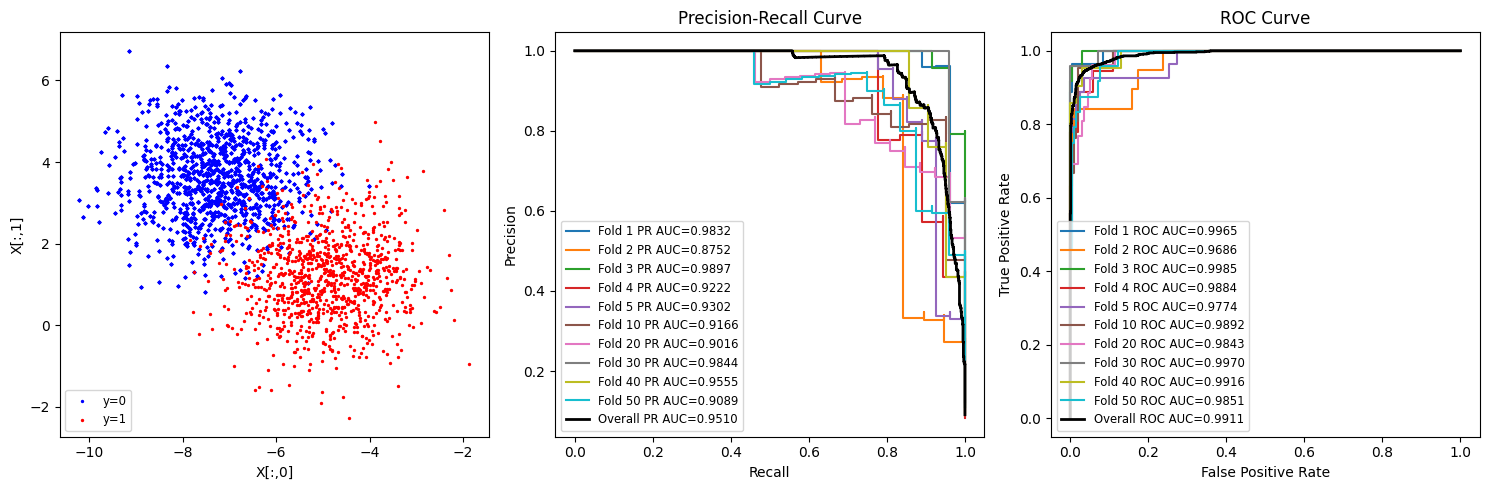

Making 100-fold cross-validation...


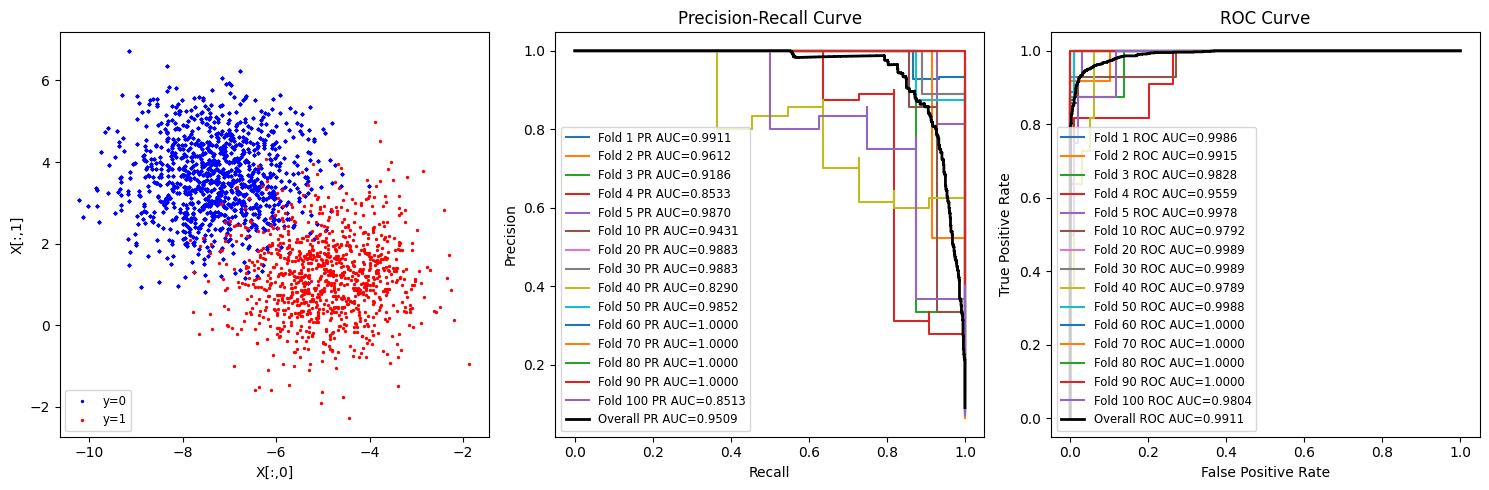

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from sklearn.model_selection import KFold
from sklearn.svm import SVC

# Два выбранных класса и признаки
choose_classes = [0, 1]
choose_features = ['feature_2', 'feature_4']

# Фильтрация данных по выбранным классам
ds = datasets['df10']
df_filtered = ds[ds['target'].isin(choose_classes)]

# Выбор только указанных признаков
X = df_filtered[choose_features].values
y = df_filtered['target'].values

# Список фолдов для кросс-валидации
n_splits_list = [3, 5, 10, 20, 50, 100]

for n_splits in n_splits_list:
    print(f"Making {n_splits}-fold cross-validation...")
    
    FOLDS = n_splits
    
    # Инициализация графиков
    f, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Визуализация распределения данных по выбранным признакам
    axes[0].scatter(X[y == 0, 0], X[y == 0, 1], color='blue', s=2, label='y=0')
    axes[0].scatter(X[y == 1, 0], X[y == 1, 1], color='red', s=2, label='y=1')
    axes[0].set_xlabel('X[:,0]')
    axes[0].set_ylabel('X[:,1]')
    axes[0].legend(loc='lower left', fontsize='small')

    # Настройка кросс-валидации
    k_fold = KFold(n_splits=FOLDS, shuffle=True, random_state=12345)
    predictor = SVC(kernel='linear', C=1.0, probability=True, random_state=12345)

    y_real = []
    y_proba = []

    # Проходим по фолдам и строим Precision-Recall и ROC кривые
    for i, (train_index, test_index) in enumerate(k_fold.split(X)):
        Xtrain, Xtest = X[train_index], X[test_index]
        ytrain, ytest = y[train_index], y[test_index]

        # Обучение модели
        predictor.fit(Xtrain, ytrain)

        # Предсказание вероятностей
        pred_proba = predictor.predict_proba(Xtest)

        # Расчет precision-recall
        precision, recall, _ = precision_recall_curve(ytest, pred_proba[:, 1])
        # Расчет ROC
        fpr, tpr, _ = roc_curve(ytest, pred_proba[:, 1])

        # Добавляем кривую на график только от 1-ого до 5-ого фолда и каждого 10-го фолда
        if i <= 4 or (i > 4 and (i + 1) % 10 == 0):
            # Лейбл с AUC для каждого фолда
            lab_pr = f'Fold {i+1} PR AUC={auc(recall, precision):.4f}'
            lab_roc = f'Fold {i+1} ROC AUC={auc(fpr, tpr):.4f}'

            # Добавляем кривую Precision-Recall на график
            axes[1].step(recall, precision, label=lab_pr)

            # Добавляем кривую ROC на график
            axes[2].plot(fpr, tpr, label=lab_roc)

        # Сохраняем реальные и предсказанные значения для всех фолдов
        y_real.append(ytest)
        y_proba.append(pred_proba[:, 1])

    # Объединяем данные всех фолдов
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)

    # Строим общую кривую Precision-Recall
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    lab_pr_overall = f'Overall PR AUC={auc(recall, precision):.4f}'
    axes[1].step(recall, precision, label=lab_pr_overall, lw=2, color='black')

    # Строим общую кривую ROC
    fpr, tpr, _ = roc_curve(y_real, y_proba)
    lab_roc_overall = f'Overall ROC AUC={auc(fpr, tpr):.4f}'
    axes[2].plot(fpr, tpr, label=lab_roc_overall, lw=2, color='black')

    # Подписи осей и легенда для Precision-Recall
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].legend(loc='lower left', fontsize='small')
    axes[1].set_title('Precision-Recall Curve')

    # Подписи осей и легенда для ROC
    axes[2].set_xlabel('False Positive Rate')
    axes[2].set_ylabel('True Positive Rate')
    axes[2].legend(loc='lower left', fontsize='small')
    axes[2].set_title('ROC Curve')

    # Настройка оформления
    f.tight_layout()

    # Сохранение графика в файл для каждого n_splits
    # f.savefig(f'result_{n_splits}_folds.png')

    plt.show()
